### Behavior analysis for Madeline data

In [1]:
from abc import abstractmethod

import numpy as np
import pandas as pd
import h5py
import os
from pyPlotHW import StartPlots, StartSubplots
from utility_HW import bootstrap
import glob
from tqdm import tqdm
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

from scipy.optimize import minimize
from scipy.stats import norm, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison


import pandas as pd
import pickle

from behavior_base import PSENode, EventNode
from behavioral_pipeline import GoNogoBehaviorMat, GoNogoBehaviorSum

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

## 1. define input data directory

In [3]:
root_dir = r'Z:\HongliWang\Madeline'

## 2. create the behavioral analysis object

In [4]:
beh_sum = GoNogoBehaviorSum(root_dir)

# 2.1. Running analysis on an example session and plot the result (optional)

In [27]:
animal = 'JUV014'
session = '220408'
input_path = r'Z:\HongliWang\Madeline\processed_behavior\JUV014\JUV014-220408-behaviorLOG.mat'

In [28]:
x = GoNogoBehaviorMat(animal, session, input_path)
x.to_df()
output_path = r'Z:\HongliWang\Madeline\analysis\behavior\ADT009\220409'
plot_path = os.path.join(output_path, 'beh_plot')
ifrun = True

# 2.1.1: session summary

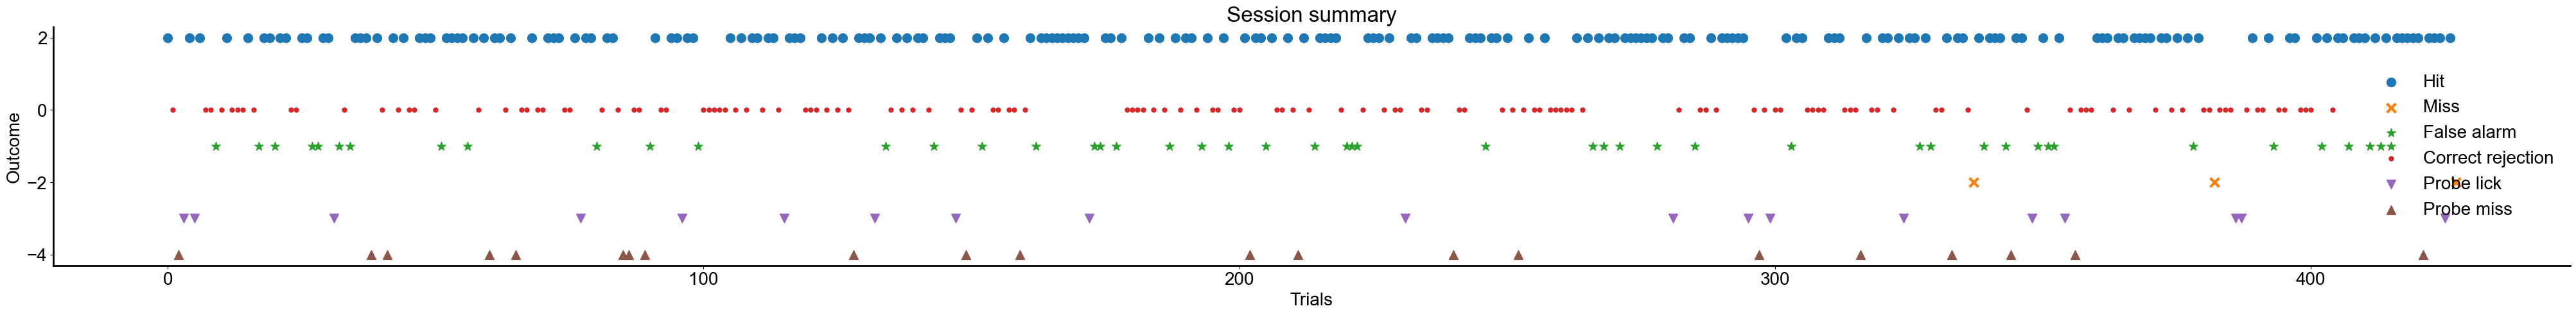

In [29]:
x.beh_session(plot_path, ifrun)

# psychometric curve

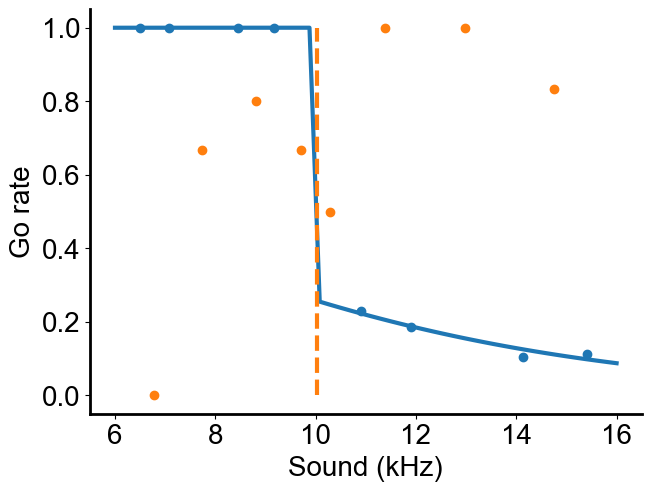

In [30]:
x.psycho_curve(plot_path, ifrun)

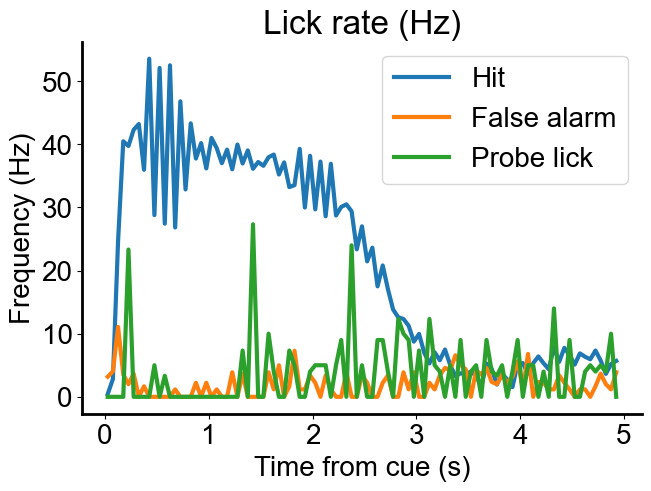

In [31]:
x.lick_rate(plot_path, ifrun)

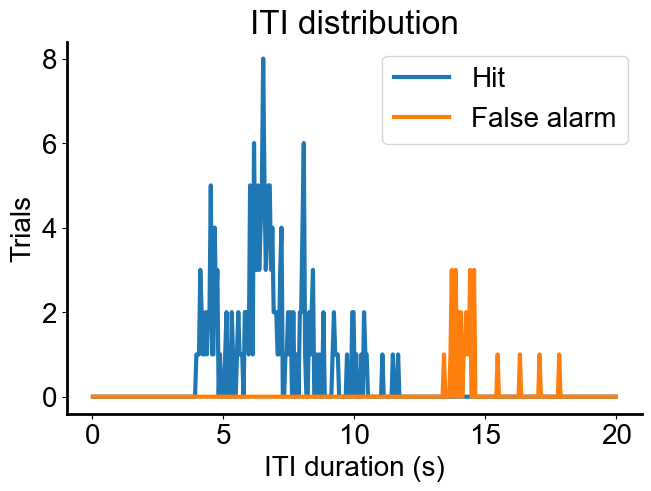

In [32]:
x.ITI_distribution(plot_path, ifrun)

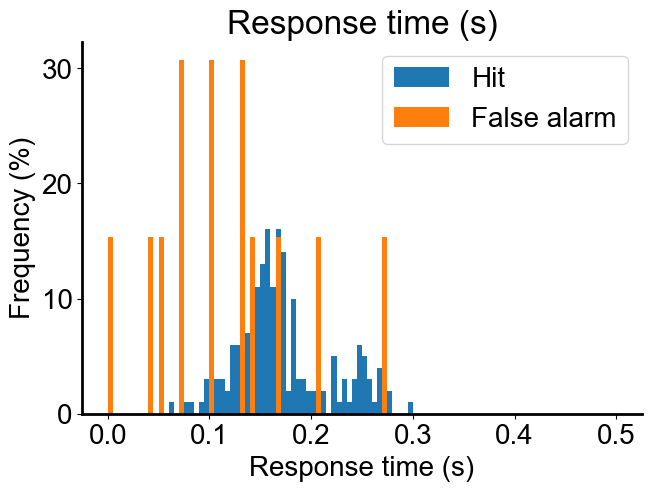

In [33]:
x.response_time(plot_path, ifrun)

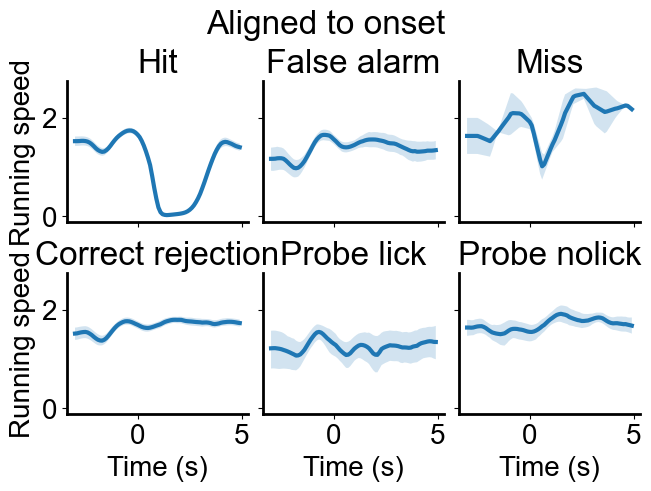

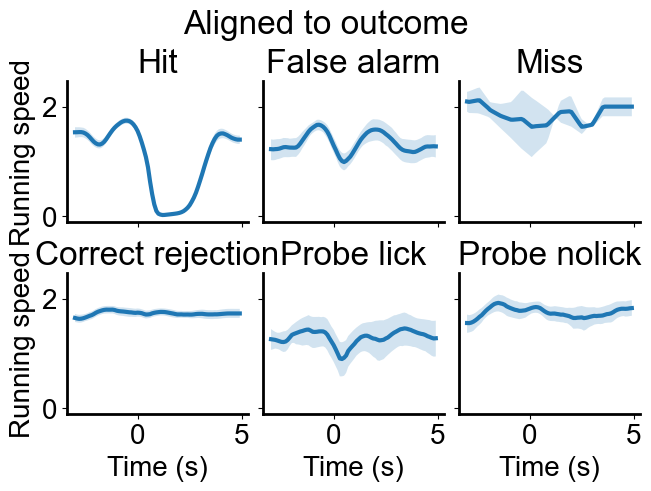

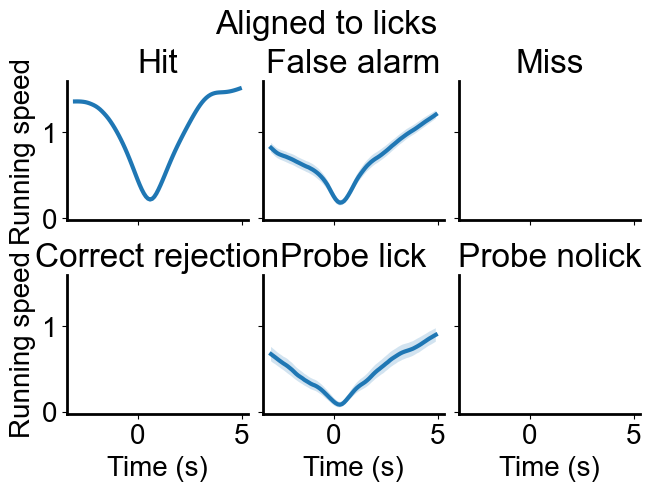

In [34]:
x.running_aligned('onset', plot_path, ifrun)
x.running_aligned('outcome', plot_path, ifrun)
x.running_aligned('licks', plot_path, ifrun)

## 3. process every single session, save the data and plots

In [9]:
# set the ifrun = True for the first time
# once the analysis is done, no need to rerun it. Simply read the saved data using read_data method
import warnings
warnings.filterwarnings('ignore')

# beh_sum.process_singleSession(ifrun=False)
beh_sum.read_data()

100%|████████████████████████████████████████████████████████████████████████████████| 296/296 [00:53<00:00,  5.53it/s]


In [10]:
savefigpath = os.path.join(root_dir,'summary','behavior')

### 3.1.plot the learning process as d-prime in 50 trial blocks over time, aligned to the introduction of novel stimulus

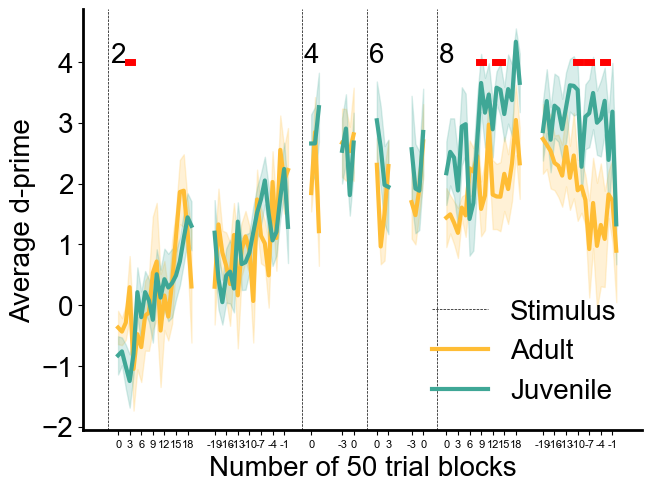

In [11]:
beh_sum.plot_dP(savefigpath)

### 3.2. plot the learning in response time, averaged over block of 50 trials, aligned to the introduction of novel stimulus
anova and posthoc stats are performed over end stage behavior (averaged across the final 1000 trials)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  6.22it/s]


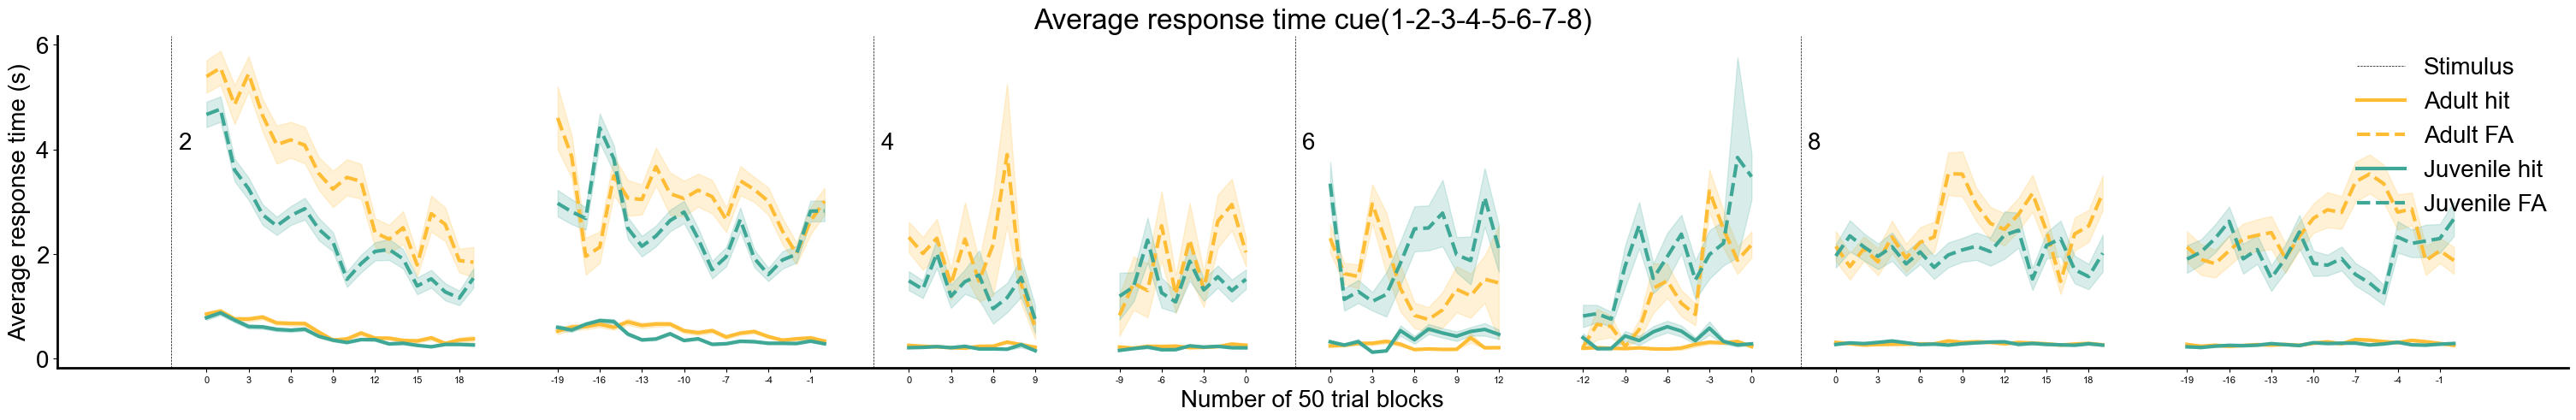

                    sum_sq       df            F        PR(>F)
age              85.412867      1.0    29.239615  6.498082e-08
response      11674.053632      1.0  3996.410064  0.000000e+00
age:response    149.388087      1.0    51.140424  9.014302e-13
Residual      41956.263159  14363.0          NaN           NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  ADTgo ADTnogo   2.1888    0.0  2.0739  2.3037   True
  ADTgo   JUVgo  -0.0175 0.9576 -0.1062  0.0713  False
  ADTgo JUVnogo   1.7279    0.0  1.6131  1.8428   True
ADTnogo   JUVgo  -2.2063    0.0 -2.3167 -2.0959   True
ADTnogo JUVnogo  -0.4609    0.0 -0.5931 -0.3286   True
  JUVgo JUVnogo   1.7454    0.0  1.6351  1.8557   True
------------------------------------------------------


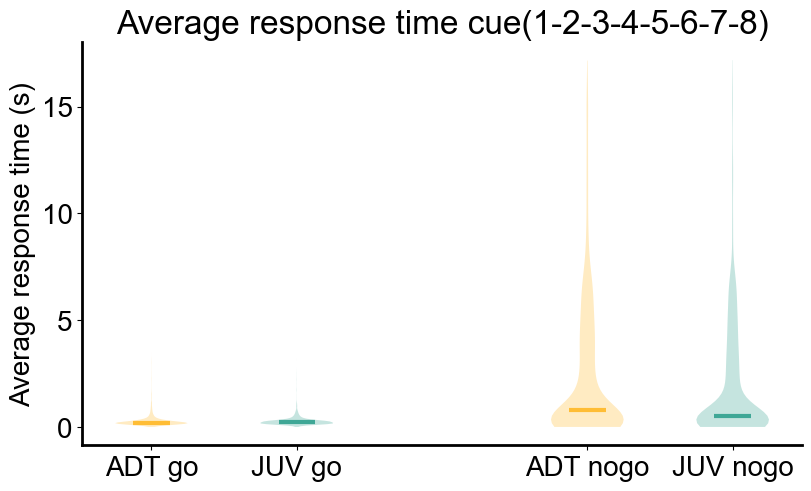

In [12]:
beh_sum.plot_rt([1,2,3,4,5,6,7,8],savefigpath)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.12it/s]


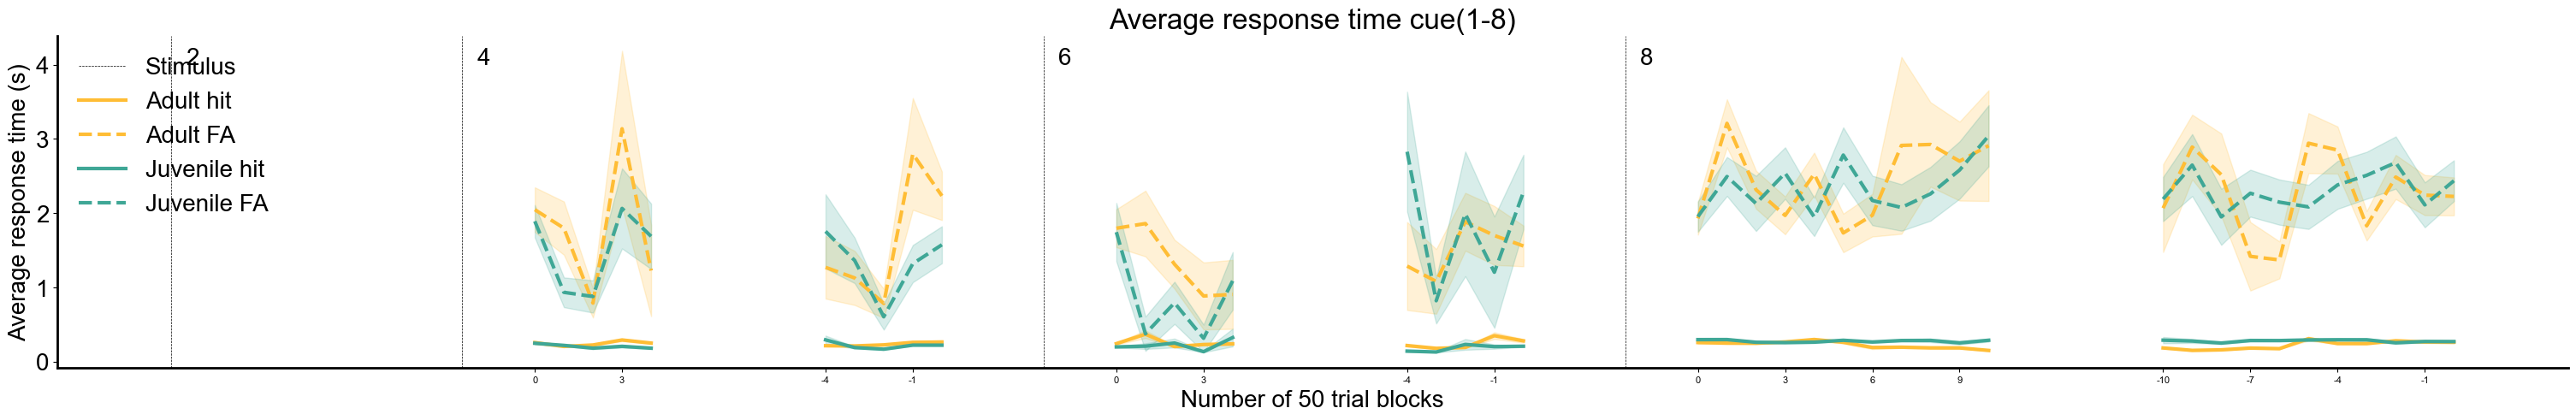

                    sum_sq      df            F    PR(>F)
age               0.353715     1.0     0.156514  0.692401
response       5005.522905     1.0  2214.881573  0.000000
age:response      0.033243     1.0     0.014710  0.903471
Residual      12929.177291  5721.0          NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  ADTgo ADTnogo   2.0805    0.0  1.9018  2.2592   True
  ADTgo   JUVgo   0.0192 0.9785 -0.1047  0.1432  False
  ADTgo JUVnogo   2.0888    0.0  1.9309  2.2467   True
ADTnogo   JUVgo  -2.0612    0.0 -2.2299 -1.8926   True
ADTnogo JUVnogo   0.0083 0.9995 -0.1866  0.2033  False
  JUVgo JUVnogo   2.0696    0.0  1.9232   2.216   True
------------------------------------------------------


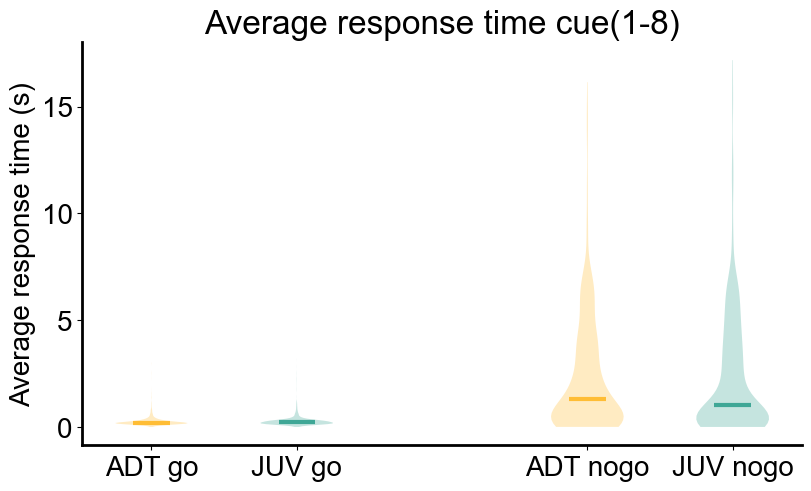

In [13]:
beh_sum.plot_rt([1, 8], savefigpath)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.58it/s]


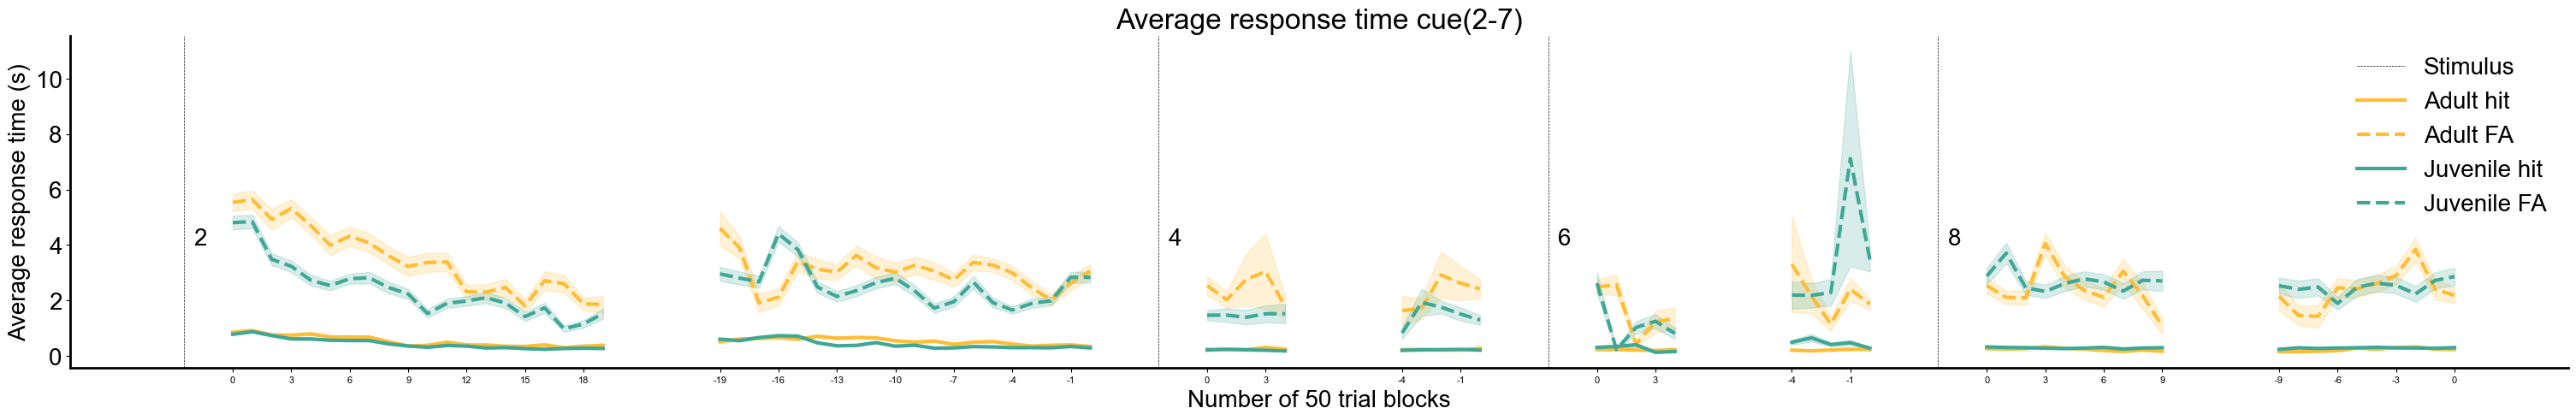

                    sum_sq      df            F    PR(>F)
age               9.144303     1.0     3.194883  0.073914
response       8043.829956     1.0  2810.394497  0.000000
age:response      4.412104     1.0     1.541523  0.214434
Residual      19354.001090  6762.0          NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  ADTgo ADTnogo   2.3585    0.0  2.1584  2.5586   True
  ADTgo   JUVgo    0.044  0.821 -0.0862  0.1742  False
  ADTgo JUVnogo   2.5223    0.0  2.3597  2.6849   True
ADTnogo   JUVgo  -2.3145    0.0 -2.5015 -2.1274   True
ADTnogo JUVnogo   0.1638 0.1897 -0.0471  0.3747  False
  JUVgo JUVnogo   2.4783    0.0  2.3319  2.6246   True
------------------------------------------------------


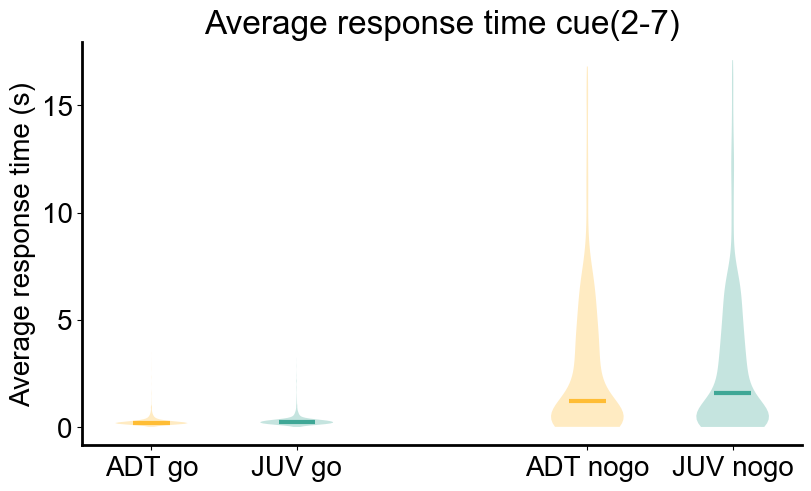

In [14]:
beh_sum.plot_rt([2,7], savefigpath)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.59it/s]


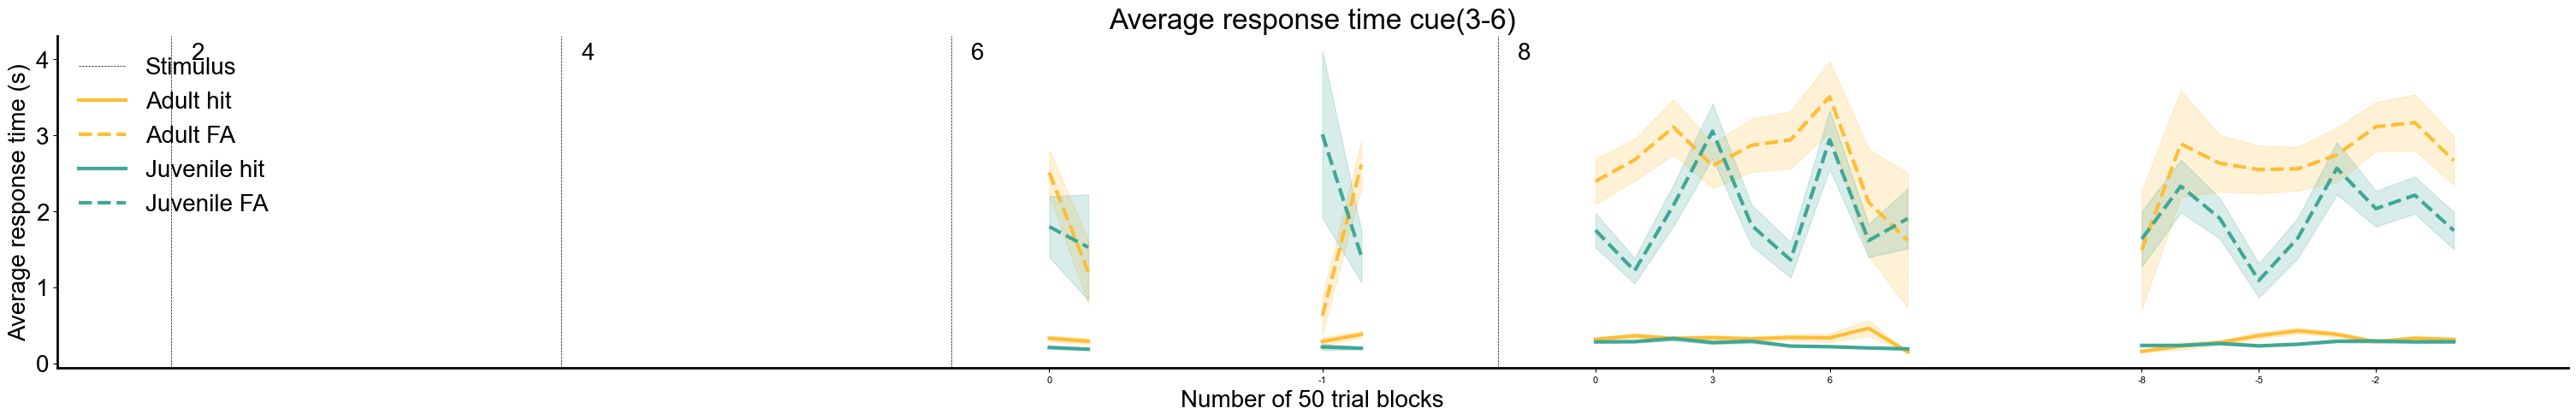

                    sum_sq      df            F         PR(>F)
age             132.680789     1.0    44.009596   3.617544e-11
response       4325.383000     1.0  1434.709277  6.730215e-276
age:response    159.167627     1.0    52.795156   4.280489e-13
Residual      14911.274822  4946.0          NaN            NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  ADTgo ADTnogo   2.4491    0.0   2.245  2.6532   True
  ADTgo   JUVgo  -0.0768 0.5989 -0.2354  0.0819  False
  ADTgo JUVnogo    1.593    0.0  1.3913  1.7947   True
ADTnogo   JUVgo  -2.5258    0.0 -2.7137  -2.338   True
ADTnogo JUVnogo  -0.8561    0.0 -1.0815 -0.6307   True
  JUVgo JUVnogo   1.6698    0.0  1.4845   1.855   True
------------------------------------------------------


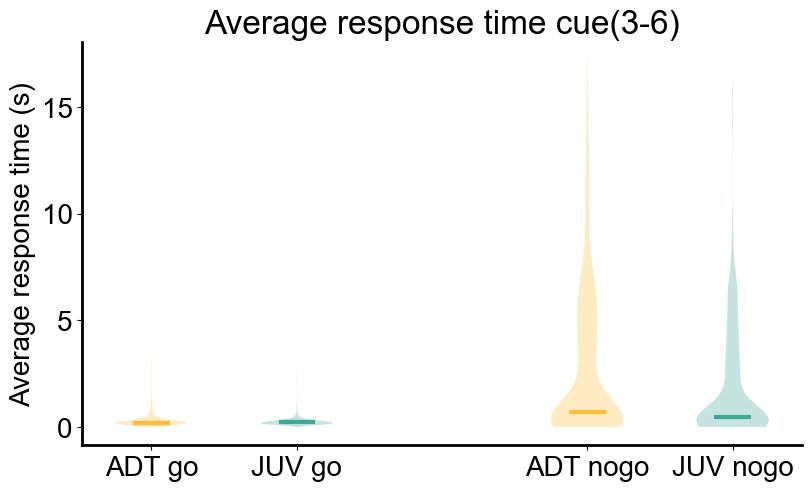

In [15]:
beh_sum.plot_rt([3, 6], savefigpath)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 13.44it/s]


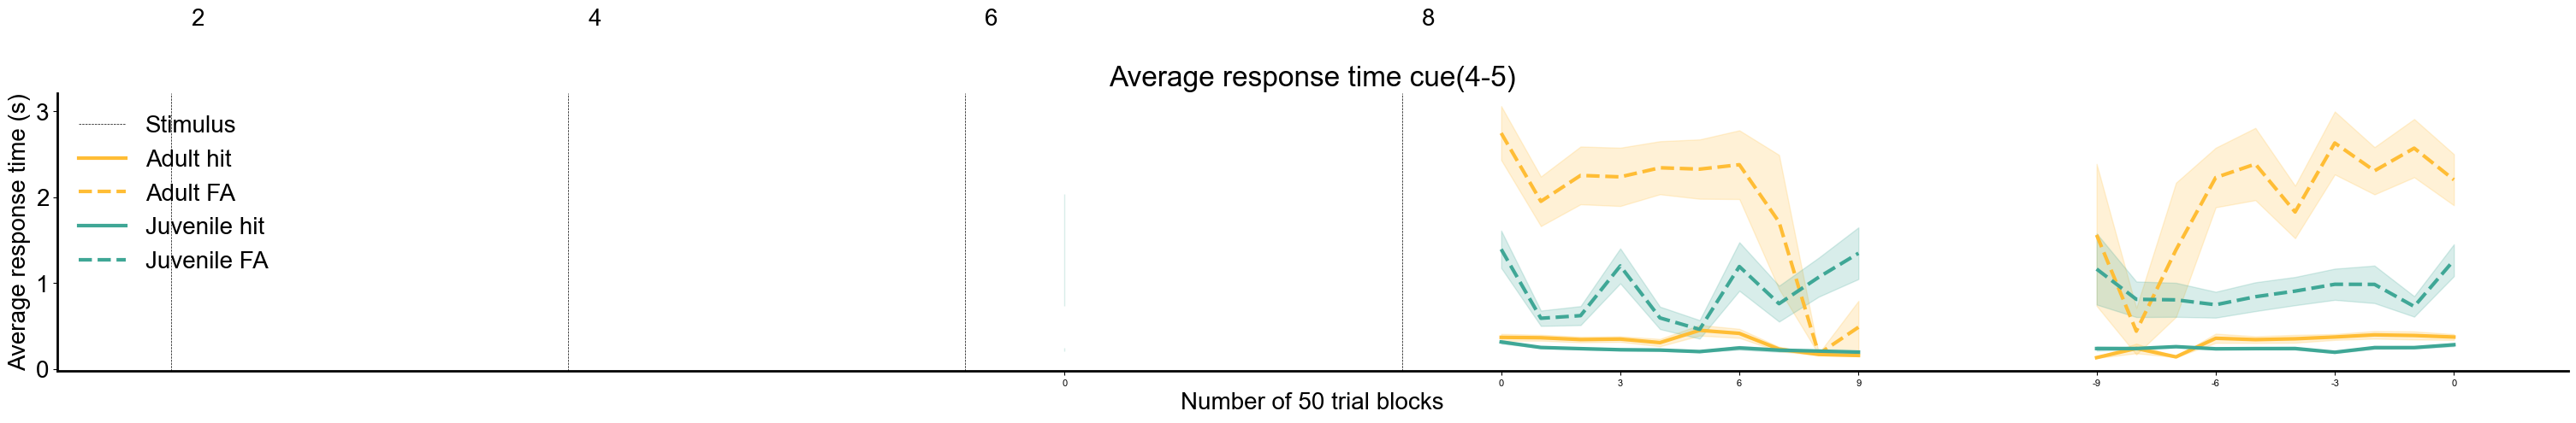

                    sum_sq      df           F         PR(>F)
age             454.466878     1.0  146.564359   2.862104e-33
response       1594.112409     1.0  514.097012  2.179497e-108
age:response    410.197979     1.0  132.287757   3.115455e-30
Residual      15404.778209  4968.0         NaN            NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  ADTgo ADTnogo   1.8855    0.0  1.6776  2.0933   True
  ADTgo   JUVgo  -0.1251 0.2499 -0.2989  0.0486  False
  ADTgo JUVnogo   0.5533    0.0   0.355  0.7516   True
ADTnogo   JUVgo  -2.0106    0.0 -2.1934 -1.8278   True
ADTnogo JUVnogo  -1.3322    0.0 -1.5385 -1.1259   True
  JUVgo JUVnogo   0.6784    0.0  0.5065  0.8503   True
------------------------------------------------------


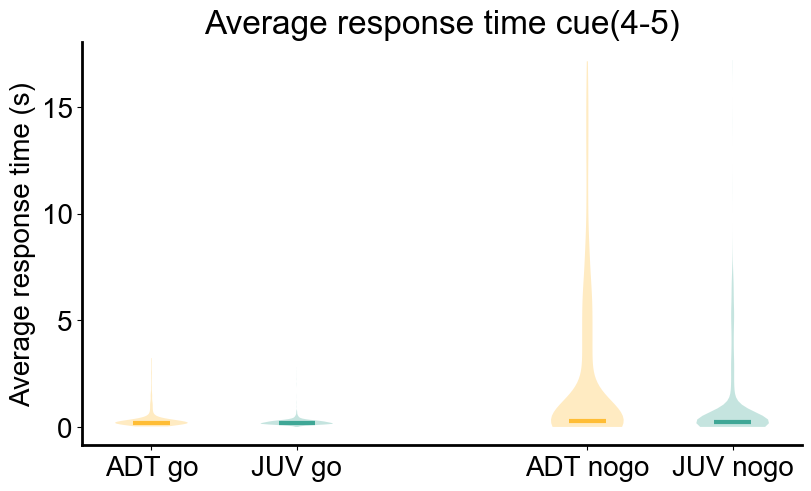

In [16]:
beh_sum.plot_rt([4, 5], savefigpath)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.30it/s]


                    sum_sq     df          F        PR(>F)
age              90.615751    1.0   4.473715  3.466864e-02
response        943.581038    1.0  46.584754  1.524658e-11
age:response     41.408152    1.0   2.044327  1.530890e-01
Residual      20113.360971  993.0        NaN           NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  ADTgo ADTnogo   1.3725 0.0329   0.077  2.668   True
  ADTgo   JUVgo   0.2732 0.9014 -0.7476  1.294  False
  ADTgo JUVnogo   2.5228    0.0  1.4835 3.5621   True
ADTnogo   JUVgo  -1.0993 0.0814 -2.2874 0.0888  False
ADTnogo JUVnogo   1.1503 0.0672 -0.0538 2.3543  False
  JUVgo JUVnogo   2.2496    0.0  1.3476 3.1515   True
-----------------------------------------------------


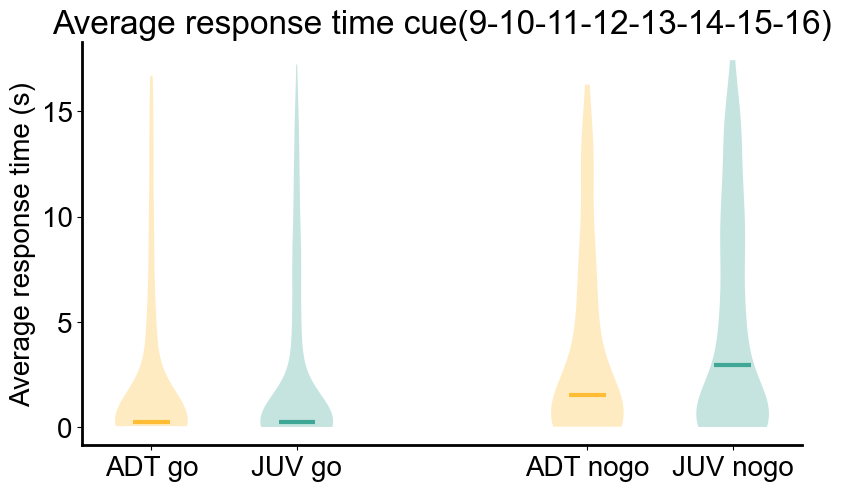

In [17]:
beh_sum.plot_rt([9,10,11,12,13,14,15,16], savefigpath)

## 3.3 plot the average psychometric curve, fit to logistic regression
p(go) = logit(beta0 + beta1 * go_stim + beta2 * nogo_stim) 

             sum_sq     df          F         PR(>F)
age        0.005727    1.0   0.083908   7.721349e-01
cue       78.907702   15.0  77.070221  2.184308e-151
age:cue    0.603472   15.0   0.589419   8.846769e-01
Residual  63.409926  929.0        NaN            NaN


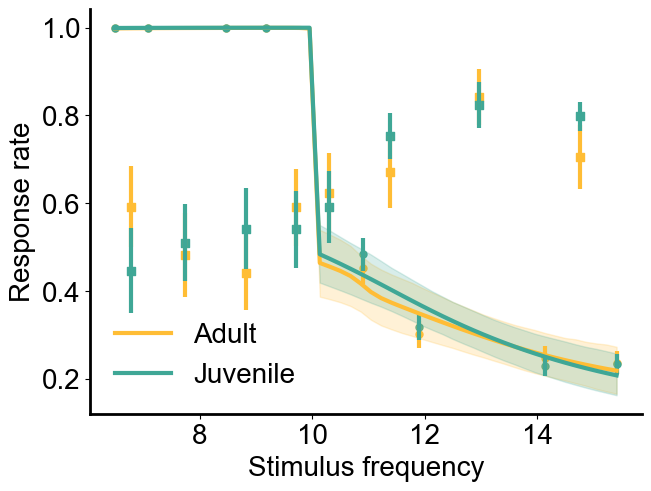

In [18]:
beh_sum.plot_psycho(savefigpath)